# Install libraries

In [ ]:
!pip install category_encoders

# Import libraries

In [ ]:
# For data manipulation and analysis
import pandas as pd
# Working with arrays, vectors, matrices, lists
import numpy as np
# Working with graphs
import matplotlib.pyplot as plt
# Working with regex
import re
# Working with google drive
from google.colab import drive
# Encode categorical values with value between 0 and n-1
from sklearn.preprocessing import LabelEncoder
# Encode categorical values by mean in Y column
from category_encoders.target_encoder import TargetEncoder
# Support Random Forest algorithm for classification
from sklearn.ensemble import RandomForestClassifier
# Split original data into training and testing data
from sklearn.model_selection import train_test_split
# Calculate the accuracy and loss scores of the trained model
from sklearn.metrics import accuracy_score, log_loss

# Config settings

In [ ]:
# Enable copy on write behavior in pandas
# Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#copy-on-write
pd.options.mode.copy_on_write = True

# Read the dataset

Next, I will access to my dataset by providing the path to the file. My file is located at `/Stockton university/Graduate Research Symposium/whale-watch-data.csv` so that path will be:

In [ ]:
# Define file url
file_id = '?'
dataset_file_url = f'https://drive.google.com/uc?id={file_id}'

Note:

- *Use this command `!ls '/content/drive/My Drive/'` to quickly view folders and files in Google Drive root folder.*

Then I will read the file using pandas library:

In [ ]:
# Read the dataset file
raw_df = pd.read_csv(dataset_file_url, encoding='windows-1252')

Note:

- *`encoding='windows-1252` is common for files created in Windows apps like Excel or Notepad. Pandas will try to read my dataset using the UTF-8 encoding, but it may encounter some bytes only from Windows (e.g. 0x92, often a "smart" or curly quote from Windows) and will raise an error.*

# Explore the dataset

## Get an overview of data

In [ ]:
# Print dataset info
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12325 entries, 0 to 12324
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     12323 non-null  object 
 1   Trip                     12245 non-null  object 
 2   Trip Start Time          12228 non-null  object 
 3   Trip End Time            12213 non-null  object 
 4   Vessel                   12270 non-null  object 
 5   Captain                  11685 non-null  object 
 6   Naturalist               11560 non-null  object 
 7   Data Collector           11669 non-null  object 
 8   Data Entered in By       11667 non-null  object 
 9   Photographer             10413 non-null  object 
 10  Whale SENSE Mentioned?   11662 non-null  object 
 11  Atmosphere               11606 non-null  object 
 12  Precipitation            701 non-null    object 
 13  Visibility               11607 non-null  object 
 14  Wind Speed            

## Check and remove unnamed columns

The number of columns is `16384`, this is too much columns for a dataset. I will explore the columns for more insights.<br>
First, I want to view all the column names:

In [ ]:
# View dataset column names
print(raw_df.columns)

Index(['Date', 'Trip', 'Trip Start Time', 'Trip End Time', 'Vessel', 'Captain',
       'Naturalist', 'Data Collector', 'Data Entered in By', 'Photographer',
       'Whale SENSE Mentioned?', 'Atmosphere', 'Precipitation', 'Visibility',
       'Wind Speed', 'Sea Height', 'Swell Height', 'Wind Direction',
       'Swell Direction', 'Cloud Cover', 'General Area', 'Sighting No.',
       'Species', 'Min', 'Max', 'Catologued Animals', 'Time Start', 'Time End',
       'Latitude start', 'Latitude end', 'Longitude start', 'Longitude end',
       'Water Temperature', 'Depth', 'Original Tide Recording', 'Tide Value',
       'Tide Stage', 'Behavior General', 'Feeding', 'Mating', 'Photos',
       'With Calf?', 'With Juvenile?', 'Direction Traveling',
       'With or Against Tide', 'Notes'],
      dtype='object')


There are a lot of columns start with "Unnamed: ...". These columns were assigned by default when Pandas encounters empty column headers or when an index is included during file saving.<br>
Therefore, I will remove all the columns start with "Unnamed: [integer]"

In [ ]:
# Search for columns matching "Unnamed: [integer]" using regex
unnamed_columns = [column for column in raw_df.columns
                   if re.match(r'^Unnamed: \d+$', str(column))]

# Remove those columns and assign to a new variable 'df'
df = raw_df.drop(columns=unnamed_columns)

print(f"Removed {len(unnamed_columns)} unnamed columns from the dataset")

Removed 0 unnamed columns from the dataset


Let's view the columns again:

In [ ]:
# View the columns again
print(df.columns)

Index(['Date', 'Trip', 'Trip Start Time', 'Trip End Time', 'Vessel', 'Captain',
       'Naturalist', 'Data Collector', 'Data Entered in By', 'Photographer',
       'Whale SENSE Mentioned?', 'Atmosphere', 'Precipitation', 'Visibility',
       'Wind Speed', 'Sea Height', 'Swell Height', 'Wind Direction',
       'Swell Direction', 'Cloud Cover', 'General Area', 'Sighting No.',
       'Species', 'Min', 'Max', 'Catologued Animals', 'Time Start', 'Time End',
       'Latitude start', 'Latitude end', 'Longitude start', 'Longitude end',
       'Water Temperature', 'Depth', 'Original Tide Recording', 'Tide Value',
       'Tide Stage', 'Behavior General', 'Feeding', 'Mating', 'Photos',
       'With Calf?', 'With Juvenile?', 'Direction Traveling',
       'With or Against Tide', 'Notes'],
      dtype='object')


## Check and remove columns contain no data

I will check if any column has no data:

In [ ]:
# Check if any column contains no data among the columns
print((df.isna() | (df == '')).all().any())

False


Cool! so I don't need to explore further in this step.

## Get an overview of data with valid columns

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12325 entries, 0 to 12324
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     12323 non-null  object 
 1   Trip                     12245 non-null  object 
 2   Trip Start Time          12228 non-null  object 
 3   Trip End Time            12213 non-null  object 
 4   Vessel                   12270 non-null  object 
 5   Captain                  11685 non-null  object 
 6   Naturalist               11560 non-null  object 
 7   Data Collector           11669 non-null  object 
 8   Data Entered in By       11667 non-null  object 
 9   Photographer             10413 non-null  object 
 10  Whale SENSE Mentioned?   11662 non-null  object 
 11  Atmosphere               11606 non-null  object 
 12  Precipitation            701 non-null    object 
 13  Visibility               11607 non-null  object 
 14  Wind Speed            

# Analyze and pick potential columns for predicting the average number of species

Now that I have a list of columns and their data type from the dataset, I will pick some columns for predicting the average number of species.

## Date - Extract month data

The number of species can change by date, but it is better to extract only the month from the date data.

First, I will convert the data type of the `Date` column from `object` to `datetime64[ns]`.

In [ ]:
# Convert to datetime
# errors='coerce': Invalid dates are converted to NaT (not a time)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

Next, I will remove all rows having the date is `NaT`.

In [ ]:
# Select rows where 'Date' column is not NaT
df = df[df['Date'].notna()]

Finally, I will extract only the month and store in a new column called `Month`.

In [ ]:
# .dt.month: Get the month as number (e.g. January=1, December=12)
df['Month'] = df['Date'].dt.month

Let's view the Month data:

In [ ]:
df['Month']

,Month
0,9
1,9
2,9
3,9
4,9
...,...
12320,12
12321,12
12322,12
12323,12


## Trip

Trip information is useful, as it likely indicates the time of day when the trip starts. First, I want to get an overview of values this column:

In [ ]:
df['Trip'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Trip,
AM,3788
AM,8
Am,3
Find Excel Data Sheet!,1
Fireworks,2
PM,5787
Pelagic,337
SEAS,10
SS,2226


Then I need to filter the values that only within this pre-defined list: `['AM', 'PM', 'SS', 'SEAS', 'Pelagic', 'Special']`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Trip'] = df['Trip'].str.strip()

# Replace values in the Trip column
df.replace({"Trip": {
    'pm': 'PM', 'pM': 'PM', 'Am': 'AM', 'ss': 'SS'
}}, inplace=True)

# 2. Filter values from pre-defined list
pre_defined_trip_values = ['AM', 'PM', 'SS', 'SEAS', 'Pelagic', 'Special']
df = df[df['Trip'].isin(pre_defined_trip_values)]

Get the overview of values in the `Trip` column again:

In [ ]:
df['Trip'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Trip,
AM,3799
PM,5802
Pelagic,337
SEAS,10
SS,2228
Special,24


## Atmosphere

Atmospheric conditions may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Atmosphere'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Atmosphere,
Clear,8246
Clear,7
Clearing,112
Fog,191
Hazy,1303
Overcast,1701
clearing,2
NaN,638


Then I need to filter the values that only within this pre-defined list: `['Clear', 'Fog', 'Hazy', 'Overcast', 'Clearing']`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Atmosphere'] = df['Atmosphere'].str.strip()

# Replace values
df.replace({"Atmosphere": {
    'clearing': 'Clearing'
}}, inplace=True)

# 2. Filter values from pre-defined list
pre_defined_atmosphere_values = ['Clear', 'Fog', 'Hazy', 'Overcast', 'Clearing']
df = df[df['Atmosphere'].isin(pre_defined_atmosphere_values)]

Get the overview of values in the `Atmosphere` column again:

In [ ]:
df['Atmosphere'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Atmosphere,
Clear,8253
Clearing,114
Fog,191
Hazy,1303
Overcast,1701


## Visibility

Visibility may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Visibility'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Visibility,
1-3 miles,2
.25-1 mile,136
0.25-1 miles,12
1-3 Miles,7
1-3 miles,272
3-5 miles,756
5-7 Miles,3
5-7 miles,1248
5-7 miles,7


Then I need to filter the values that only within this pre-defined list: `['< 0.25 mile', '0.25 mile', '0.25-1 miles', '1-3 miles', '3-5 miles', '5-7 miles', '7+ miles']`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Visibility'] = df['Visibility'].str.strip()

# Replace values
df.replace({"Visibility": {
    '.25-1 mile': '0.25-1 miles', '1-3 Miles': '1-3 miles',
    '5-7 Miles': '5-7 miles', '7+ Miles': '7+ miles'
}}, inplace=True)

# 2. Filter values from pre-defined list
pre_defined_visibility_values = [
    '< 0.25 mile', '0.25 mile', '0.25-1 miles', '1-3 miles', '3-5 miles',
    '5-7 miles', '7+ miles'
]
df = df[df['Visibility'].isin(pre_defined_visibility_values)]

Get the overview of values in the `Visibility` column again:

In [ ]:
df['Visibility'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Visibility,
0.25-1 miles,148
1-3 miles,281
3-5 miles,756
5-7 miles,1258
7+ miles,9033
< 0.25 mile,43


## Wind Speed

Wind Speed may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Wind Speed'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Wind Speed,
0-5 mph,169
10-15 mph,4409
15-20 mph,1978
20-25 mph,332
25-30 mph,10
30+ mph,1
5,1
5-10 mph,4567
NaN,52


Then I need to filter the values that only within this pre-defined list: `['0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20-25 mph', '25-30 mph', '30+ mph']`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Wind Speed'] = df['Wind Speed'].str.strip()

# Replace values
df.replace({"Wind Speed": {
    '5': '5-10 mph'
}}, inplace=True)

# 2. Filter values from pre-defined list
pre_defined_wind_speed_values = [
    '0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20-25 mph',
    '25-30 mph', '30+ mph'
]
df = df[df['Wind Speed'].isin(pre_defined_wind_speed_values)]

Get the overview of values in the `Wind Speed` column again:

In [ ]:
df['Wind Speed'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Wind Speed,
0-5 mph,169
10-15 mph,4409
15-20 mph,1978
20-25 mph,332
25-30 mph,10
30+ mph,1
5-10 mph,4568


## Sea Height

Sea Height may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Sea Height'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Sea Height,
1'-2',12
"3""-1'",7
"3""-1'",11
Catpaw,3
1'-2',3521
2'-3',1
2'-4',6720
2'-4',4
"3""-1'",455


Then I need to filter the values that only within this pre-defined list: `["Glass", "Catpaw", "3\"-1'", "1'-2'", "2'-4'", "4'-6'", "6'+"]`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Sea Height'] = df['Sea Height'].str.strip()

# Replace values
df.replace({"Sea Height": {
    'CatPaw': 'Catpaw', "2'-3'": "2'-4'"
}}, inplace=True)

# 2. Filter values from pre-defined list
pre_defined_sea_height_values = [
    "Glass", "Catpaw", "3\"-1'", "1'-2'", "2'-4'", "4'-6'", "6'+"
]
df = df[df['Sea Height'].isin(pre_defined_sea_height_values)]

Get the overview of values in the `Sea Height` column again:

In [ ]:
df['Sea Height'].value_counts()

,count
Sea Height,
2'-4',6725
1'-2',3533
4'-6',520
"3""-1'",473
Catpaw,149
Glass,40
6'+,5


## Swell Height

Sea Height may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Swell Height'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Swell Height,
1'-2',3
2'-4',7
1'-2',3118
2'-4',7487
4'-6',792
NaN,38


Then I need to filter the values that only within this pre-defined list: `["None", "1'-2'", "2'-4'", "4'-6'", "6'-8'"]`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Swell Height'] = df['Swell Height'].str.strip()

# 2. Filter values from pre-defined list
pre_defined_swell_height_values = ["None", "1'-2'", "2'-4'", "4'-6'", "6'-8'"]
df = df[df['Swell Height'].isin(pre_defined_swell_height_values)]

Get the overview of values in the `Swell Height` column again:

In [ ]:
df['Swell Height'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Swell Height,
1'-2',3121
2'-4',7494
4'-6',792


## Wind Direction

Wind Direction may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Wind Direction'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Wind Direction,
E,908
ENE,19
ESE,18
N,347
NE,1231
NNE,10
NNW,35
NW,2054
NW-SW,6


Then I need to filter the values that only within this pre-defined list: `['N', 'NE', 'NW', 'S', 'SE', 'SW', 'E', 'W', 'ENE', 'ESE', 'WNW', 'WSW', 'SSW', 'NNW', 'NNE', 'SSE']`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Wind Direction'] = df['Wind Direction'].str.strip()

# Replace values
df.replace({"Wind Direction": {
    'WWS': 'WSW', 'Sw': 'SW', 'SSw': 'SSW', 'Se': 'SE', 'Nw': 'NW', 'w': 'W',
    'ne': 'NE'
}}, inplace=True)

# 2. Filter values from pre-defined list
pre_defined_direction_values = [
    'N', 'NE', 'NW', 'S', 'SE', 'SW', 'E', 'W', 'ENE', 'ESE', 'WNW', 'WSW',
    'SSW', 'NNW', 'NNE', 'SSE'
]
df = df[df['Wind Direction'].isin(pre_defined_direction_values)]

Get the overview of values in the `Wind Direction` column again:

In [ ]:
df['Wind Direction'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Wind Direction,
E,908
ENE,19
ESE,18
N,347
NE,1234
NNE,10
NNW,35
NW,2057
S,1829


## Swell Direction

Swell Direction may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Swell Direction'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Swell Direction,
E,1831
ENE,1
ESE,51
N,21
NE,80
NNW,2
NW,115
S,3484
SE,4291


Then I need to filter the values that only within this pre-defined list: `[
    'N', 'NE', 'NW', 'S', 'SE', 'SW', 'E', 'W', 'ENE', 'ESE', 'WNW', 'WSW',
    'SSW', 'NNW', 'NNE', 'SSE'
]`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Swell Direction'] = df['Swell Direction'].str.strip()

# Replace values
df.replace({"Swell Direction": {
    'Sw': 'SW', 'SSw': 'SSW', 'Se': 'SE', 'e': 'E', 'w': 'W'
}}, inplace=True)

# 2. Filter values from pre-defined list
df = df[df['Swell Direction'].isin(pre_defined_direction_values)]

Get the overview of values in the `Swell Direction` column again:

In [ ]:
df['Swell Direction'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Swell Direction,
E,1837
ENE,1
ESE,51
N,21
NE,80
NNW,2
NW,115
S,3484
SE,4298


## Cloud Cover

Cloud Cover may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Cloud Cover'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Cloud Cover,
0.0,198
1.0,1236
2.0,1650
3.0,2080
4.0,1333
5.0,678
6.0,610
7.0,863
8.0,612


Then I only need to filter out NaN values:

In [ ]:
# 1. Filter values from pre-defined list
df = df[df['Cloud Cover'].notna()]

Get the overview of values in the `Cloud Cover` column again:

In [ ]:
df['Cloud Cover'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Cloud Cover,
0.0,198
1.0,1236
2.0,1650
3.0,2080
4.0,1333
5.0,678
6.0,610
7.0,863
8.0,612


## Water Temperature

Water Temperature may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Water Temperature'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Water Temperature,
0.21,1
2.07,1
15.34,1
15.75,1
16.40,1
...,...
81.84,1
82.47,2
86.76,1


I just need to convert data type of this column to numeric and remove NAs:

In [ ]:
# Fix the outliers
# Remove NAs
df = df.dropna(subset=['Water Temperature'])

Get the overview of values in the `Water Temperature Categorized` column:

In [ ]:
df['Water Temperature'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Water Temperature,
0.21,1
2.07,1
15.34,1
15.75,1
16.40,1
...,...
81.83,1
81.84,1
82.47,2


## Depth

Depth may be useful for prediction. First, I want to get an overview of values this column:

In [ ]:
df['Depth'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Depth,
0:00,3
1.1,2
1.7,1
10.0,31
10.01,1
...,...
98.9,1
99.7,1
996.0,1


I just need to convert data type of this column to numeric and remove NAs:

In [ ]:
# Fix the outliers
# Convert data from object to float
# errors='coerce': Invalid dates are converted to NaN (not a number)
df['Depth'] = pd.to_numeric(df['Depth'].copy(), errors='coerce')

# Remove NAs
df = df.dropna(subset=['Depth'])

Get the overview of values in the `Depth Category` column:

In [ ]:
df['Depth'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Depth,
1.1,2
1.7,1
4.3,1
4.6,1
5.0,1
...,...
7100.0,2
7182.0,1
7200.0,3


## Species

First, I want to get an overview of values in this column:

In [ ]:
df['Species'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Species,
T.t.,1
A. spp.Thresher Shark,1
B.a.,6
B.p.,26
Blue Whale,1
C.b. Spinner Shark,1
C.c. Loggerhead,250
C.l. Bull Shark,1
C.m. Basking Shark,2


Then I need to filter the values that only within this pre-defined list: `['T.e.', 'T.t.', 'M.n.', 'B.a.', 'B.p.', 'E.g.', 'B.m.', 'R.b. Cownose Stingray', 'D.c. Leatherback', 'C.c. Loggerhead', 'P.v. Harbor Seal', 'H.g. Grey Seal', 'D.d. Common Dolphin', 'G.g. Risso's Dolphin', 'S.c. Striped Dolphin', 'S.f. Spotted Dolphin', 'L.a. Atlantic white-sided dolphin', 'G.m. Short-finned Pilot Whale', 'Z.c. Cuvier's Beaked Whale', 'M.b. Sowerby's Beaked Whale', 'M.m. True's Beaked Whale', 'P.m. Sperm Whale', 'P.p. Portuguese Man O'War', 'Sphyrna spp. - Hammerhead', 'A. spp.Thresher Shark', 'C.m. Basking Shark', 'R.t. Whale Shark', 'M.m. Oceanic Sunfish', 'M.m. Mola mola', 'Marine Debris', 'Unidentified Delphinid Species', 'Unidentified Baleen Whale', 'Unidentified Mesoplodon', 'Unidentified Shark Species', 'Unidentified Turtle Species', 'Unidentified Sighting', 'Dead T.t.', 'Dead Sea Turtle', 'Dead Whale', 'Other, please specify in Notes']`. There are some outliers in the column, which I will fix before filtering:

In [ ]:
# 1. Fix the outliers
# Trim values
df['Species'] = df['Species'].str.strip()

# 2. Filter values from pre-defined list
pre_defined_species_values = [
    'T.e.', 'T.t.', 'M.n.', 'B.a.', 'B.p.', 'E.g.', 'B.m.',
    'R.b. Cownose Stingray', 'D.c. Leatherback', 'C.c. Loggerhead',
    'P.v. Harbor Seal', 'H.g. Grey Seal', 'D.d. Common Dolphin',
    'G.g. Risso\'s Dolphin', 'S.c. Striped Dolphin', 'S.f. Spotted Dolphin',
    'L.a. Atlantic white-sided dolphin', 'G.m. Short-finned Pilot Whale',
    'Z.c. Cuvier\'s Beaked Whale', 'M.b. Sowerby\'s Beaked Whale',
    'M.m. True\'s Beaked Whale', 'P.m. Sperm Whale',
    'P.p. Portuguese Man O\'War', 'Sphyrna spp. - Hammerhead',
    'A. spp.Thresher Shark', 'C.m. Basking Shark', 'R.t. Whale Shark',
    'M.m. Oceanic Sunfish', 'M.m. Mola mola', 'Marine Debris',
    'Unidentified Delphinid Species', 'Unidentified Baleen Whale',
    'Unidentified Mesoplodon', 'Unidentified Shark Species',
    'Unidentified Turtle Species', 'Unidentified Sighting',
    'Dead T.t.', 'Dead Sea Turtle', 'Dead Whale',
    'Other, please specify in Notes'
]
df = df[df['Species'].isin(pre_defined_species_values)]

Get the overview of values in the `Species` column again:

In [ ]:
df['Species'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Species,
A. spp.Thresher Shark,1
B.a.,6
B.p.,26
C.c. Loggerhead,250
C.m. Basking Shark,2
D.c. Leatherback,26
D.d. Common Dolphin,27
Dead Sea Turtle,4
Dead T.t.,2


### Create `Species Group` column

Species can be grouped into higher classification.

In [ ]:
# Define conditions
conditions = [
    df['Species'].isin([
      'P.v. Harbor Seal',
      'H.g. Grey Seal'
    ]),
    df['Species'].isin([
      'T.e.',
      'T.t.',
      'D.d. Common Dolphin',
      'G.g. Risso\'s Dolphin',
      'S.c. Striped Dolphin',
      'S.f. Spotted Dolphin',
      'L.a. Atlantic white-sided dolphin',
      'G.m. Short-finned Pilot Whale',
      'Z.c. Cuvier\'s Beaked Whale',
      'M.b. Sowerby\'s Beaked Whale',
      'M.m. True\'s Beaked Whale',
      'P.m. Sperm Whale',
      'Unidentified Delphinid Species'
    ]),
    df['Species'].isin([
      'M.n.',
      'B.a.',
      'B.p.',
      'E.g.',
      'B.m.',
      'Unidentified Baleen Whale'
    ]),
    df['Species'].isin([
      'R.b. Cownose Stingray',
      'Sphyrna spp. - Hammerhead',
      'A. spp.Thresher Shark',
      'C.m. Basking Shark',
      'R.t. Whale Shark',
      'Unidentified Shark Species'
    ]),
    df['Species'].isin([
      'M.m. Mola mola'
    ]),
    df['Species'].isin([
      'D.c. Leatherback',
      'C.c. Loggerhead',
      'Unidentified Turtle Species'
    ])
]

# Define corresponding values
values = [
    'Phocid',
    'Odontocete',
    'Mysticeti',
    'Chondrichthyes',
    'Osteichthyes',
    'Cheloniidae'
]

# Apply grouping
df['Species Group'] = np.select(
    conditions, values, default='Other classification'
)

Get the overview of values in the `Species Group column` column:

In [ ]:
df['Species Group'] \
  .value_counts(dropna=False) \
  .sort_index()

,count
Species Group,
Cheloniidae,283
Chondrichthyes,285
Mysticeti,580
Odontocete,9219
Other classification,84
Phocid,27


# Extract the selected columns into a new dataframe

All the columns are:

In [ ]:
# Select some columns from the df
selected_columns = [
    'Month', 'Trip', 'Atmosphere', 'Visibility', 'Wind Speed', 'Sea Height',
    'Swell Height', 'Wind Direction', 'Swell Direction', 'Cloud Cover',
    'Water Temperature', 'Depth', 'Species Group'
]
extracted_df = df[selected_columns].copy()
print(extracted_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10478 entries, 698 to 12324
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              10478 non-null  int32  
 1   Trip               10478 non-null  object 
 2   Atmosphere         10478 non-null  object 
 3   Visibility         10478 non-null  object 
 4   Wind Speed         10478 non-null  object 
 5   Sea Height         10478 non-null  object 
 6   Swell Height       10478 non-null  object 
 7   Wind Direction     10478 non-null  object 
 8   Swell Direction    10478 non-null  object 
 9   Cloud Cover        10478 non-null  float64
 10  Water Temperature  10478 non-null  float64
 11  Depth              10478 non-null  float64
 12  Species Group      10478 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.1+ MB
None


# Export the extracted version of the dataframe

In [ ]:
# index=False: avoiding writing row names
extracted_df.to_csv('cleaned-whale-watch-data.csv', index=False)

# Train the Random Forest model and compute the feature importance values

## Definition

Feature importance in a Random Forest indicate how much each feature contributes to the model's predictive power. It's a way to rank features based on their usefulness in splitting the data across all the trees in the forest. The higher the importance, the more that feature helps reduce uncertainty (e.g., impurity) in the predictions.

In this notebook, I will use Entropy method to calculate the feature importance values.

Interpretation:
- Features with higher importance scores have a greater influence on the tree's decisions.

- FI scores are often normalized to sum to 1 or 100%.

## Trasform the `Species Group` column (Y)

In [ ]:
# Encode Species column
species_group_encoder = LabelEncoder()
extracted_df['Species Group Encoded'] = species_group_encoder.fit_transform(
    extracted_df['Species Group']
)

Print encoded values:

In [ ]:
print(
    "\nEncoded Target Variable:\n",
    extracted_df[['Species Group', 'Species Group Encoded']] \
      .drop_duplicates() \
      .sort_values(by='Species Group Encoded')
)


Encoded Target Variable:
              Species Group  Species Group Encoded
973            Cheloniidae                      0
791         Chondrichthyes                      1
872              Mysticeti                      2
698             Odontocete                      3
1045  Other classification                      4
4950                Phocid                      5


## Split train and test data

First, I will split data into train and test sets.

I decide split the features (X) before transforming to prevent data leakage and ensure the model generalizes well.

For more information:

1. Split the dataset first → Prevents the model from seeing the test set.
2. Fit the encoders only on training data → Ensures encoding is based only on training distribution.
3. Transform the test data (without refitting) → Prevents data leakage.

Note: Unlike features (X), which must be split before encoding to avoid data leakage, encoding Y before splitting is safe.

In [ ]:
# Split data into train and test
X = extracted_df.drop(columns=['Species Group', 'Species Group Encoded'])
Y = extracted_df['Species Group Encoded']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2)

## Transform X values

First, I want transform all columns having object or category type to numeric type:

In [ ]:
# Initialize label encoders
visibility_encoder = LabelEncoder()
wind_speed_encoder = LabelEncoder()
sea_height_encoder = LabelEncoder()
swell_height_encoder = LabelEncoder()

# Fit on training data and transform
X_train['Visibility Encoded'] = visibility_encoder \
  .fit_transform(X_train['Visibility'])
X_train['Wind Speed Encoded'] = wind_speed_encoder \
  .fit_transform(X_train['Wind Speed'])
X_train['Sea Height Encoded'] = sea_height_encoder \
  .fit_transform(X_train['Sea Height'])
X_train['Swell Height Encoded'] = swell_height_encoder \
  .fit_transform(X_train['Swell Height'])

# TRANSFORM test data
X_test['Visibility Encoded'] = visibility_encoder \
  .transform(X_test['Visibility'])
X_test['Wind Speed Encoded'] = wind_speed_encoder \
  .transform(X_test['Wind Speed'])
X_test['Sea Height Encoded'] = sea_height_encoder \
  .transform(X_test['Sea Height'])
X_test['Swell Height Encoded'] = swell_height_encoder \
  .transform(X_test['Swell Height'])

# ---------------------------

# Initialize target encoders
trip_encoder = TargetEncoder()
atmosphere_encoder = TargetEncoder()
wind_direction_encoder = TargetEncoder()
swell_direction_encoder = TargetEncoder()

# Fit on training data and transform
X_train['Trip Encoded'] = trip_encoder \
  .fit_transform(X_train['Trip'], Y_train)
X_train['Atmosphere Encoded'] = atmosphere_encoder \
  .fit_transform(X_train['Atmosphere'], Y_train)
X_train['Wind Direction Encoded'] = wind_direction_encoder \
  .fit_transform(X_train['Wind Direction'], Y_train)
X_train['Swell Direction Encoded'] = swell_direction_encoder \
  .fit_transform(X_train['Swell Direction'], Y_train)

# TRANSFORM test data
X_test['Trip Encoded'] = trip_encoder \
  .transform(X_test['Trip'])
X_test['Atmosphere Encoded'] = atmosphere_encoder \
  .transform(X_test['Atmosphere'])
X_test['Wind Direction Encoded'] = wind_direction_encoder \
  .transform(X_test['Wind Direction'])
X_test['Swell Direction Encoded'] = swell_direction_encoder \
  .transform(X_test['Swell Direction'])

# ---------------------------

# Drop the original columns
X_train.drop(columns=[
    'Visibility', 'Wind Speed', 'Sea Height', 'Swell Height',
    'Trip', 'Atmosphere', 'Wind Direction', 'Swell Direction'
], inplace=True)
X_test.drop(columns=[
    'Visibility', 'Wind Speed', 'Sea Height', 'Swell Height',
    'Trip', 'Atmosphere', 'Wind Direction', 'Swell Direction'
], inplace=True)

# ---------------------------

# Rename

## Find the number of sub-trees that make the best prediction (n_estimators)

First, I will collect accuracies and losses within 1000 iterations

In [ ]:
default_graph_font_size = 15
graph_title_font_size = default_graph_font_size + 4

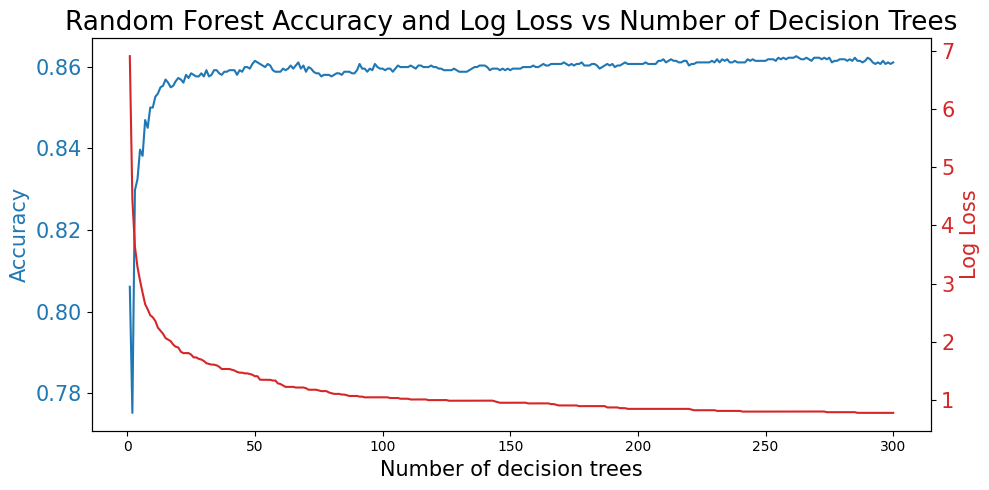

In [ ]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Lists to store accuracy and loss values
accuracies = []
losses = []

# Train the model and evaluate performance
for i in range(1, 301):
  rf_model.n_estimators = i
  rf_model.fit(X_train, Y_train)

  # Predict on the test set
  Y_prediction = rf_model.predict(X_test)
  # Know how confident the model is about its predictions
  Y_prediction_probability = rf_model.predict_proba(X_test)

  # Calculate accuracy
  accuracy = accuracy_score(Y_test, Y_prediction)
  accuracies.append(accuracy)

  # Calculate log_loss
  loss = log_loss(Y_test, Y_prediction_probability)
  losses.append(loss)

# Plot Accuracy and Loss
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot accuracy on the left y-axis
ax1.set_xlabel('Number of decision trees', fontsize=default_graph_font_size)
ax1.set_ylabel('Accuracy', color='tab:blue', fontsize=default_graph_font_size)
ax1.plot(range(1, 301), accuracies, color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y',
                labelcolor='tab:blue',
                labelsize=default_graph_font_size)

# Create another y-axis to plot the log loss
ax2 = ax1.twinx()
ax2.set_ylabel('Log Loss', color='tab:red', fontsize=default_graph_font_size)
ax2.plot(range(1, 301), losses, color='tab:red', label='Log Loss')
ax2.tick_params(axis='y',
                labelcolor='tab:red',
                labelsize=default_graph_font_size)

# Title and grid
plt.title('Random Forest Accuracy and Log Loss vs Number of Decision Trees',
          fontsize=graph_title_font_size)
fig.tight_layout()

# Show the plot
plt.show()

So 150 is the optimal number of decision trees

## Train Random Forest Classifier

In [ ]:
# n_estimators: Number of trees in the random forest
numer_of_decision_trees = 150

In [ ]:
rfc = RandomForestClassifier(n_estimators=numer_of_decision_trees,
                             random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

## Make predictions on test data

In [ ]:
Y_prediction = rfc.predict(X_test)

## Calculate Accuracy

In [ ]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = accuracy_score(Y_test, Y_prediction)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8716603053435115


## Calculate the importance of feature columns

In [ ]:
# Get feature importance values
feature_importances = rfc.feature_importances_

# Print feature importances
print("Feature Importance Mapping:")
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {rfc.feature_importances_[i]}")

Feature Importance Mapping:
Month: 0.08021815355123055
Cloud Cover: 0.0847261416084715
Water Temperature: 0.24329856833992428
Depth: 0.2914622550948604
Visibility Encoded: 0.020099381126836447
Wind Speed Encoded: 0.03517543513320801
Sea Height Encoded: 0.027146005371216895
Swell Height Encoded: 0.02219421000834672
Trip Encoded: 0.05119313965691775
Atmosphere Encoded: 0.018128827891539266
Wind Direction Encoded: 0.07544922589572224
Swell Direction Encoded: 0.05090865632172588


## Create a bar plot to view the feature importance values

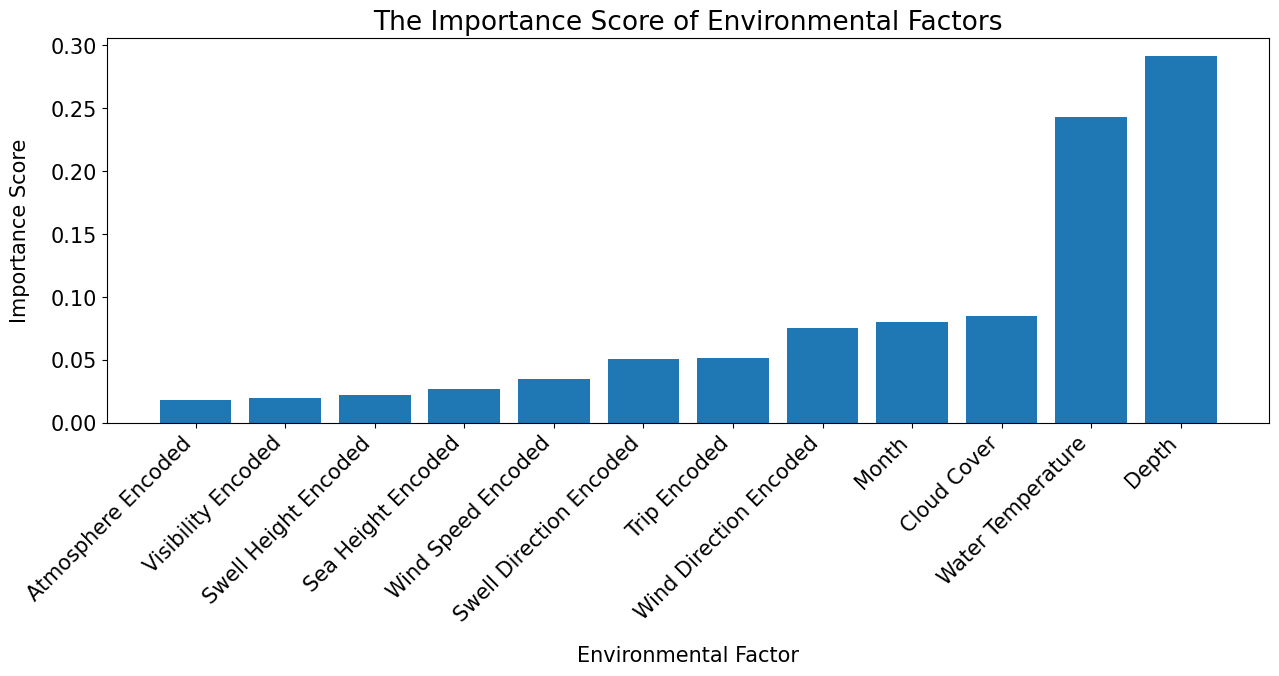

In [ ]:
# Sort features by importance in ascending order
sorted_index = np.argsort(feature_importances)
sorted_features = [X_train.columns[i] for i in sorted_index]

# Plot Feature Importance
# Define figure size
plt.figure(figsize=(15, 5))
plt.bar(sorted_features, feature_importances[sorted_index])
# Rotate labels 45 degrees
plt.xticks(rotation=45, ha='right')
# Set labels
plt.xlabel("Environmental Factor", fontsize=default_graph_font_size, labelpad=15)
plt.ylabel("Importance Score", fontsize=default_graph_font_size, labelpad=15)
plt.title("The Importance Score of Environmental Factors",
          fontsize=graph_title_font_size)

# Set font size for tick labels on x and y axes
plt.tick_params(axis='x', labelsize=default_graph_font_size)
plt.tick_params(axis='y', labelsize=default_graph_font_size)

# Display graph
plt.show()

# Remove unnecessary features and retrain the Random Forest model

Now that I have the importance values calculated, I will remove some features with low importance or was suggested based on domain knowledge:
```['Cloud Cover', 'Visibility', 'Atmosphere', 'Swell Height', 'Sea Height', 'Wind Speed']```

## Split train and test data (second times)

In [ ]:
# Split data into train and test again
X = extracted_df.drop(columns=[
    'Species Group', 'Species Group Encoded', 'Cloud Cover', 'Visibility',
    'Atmosphere', 'Swell Height', 'Sea Height', 'Wind Speed'
])
Y = extracted_df['Species Group Encoded']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.25)

## Transform X values (second times)

In [ ]:
# Initialize target encoders
trip_encoder = TargetEncoder()
wind_direction_encoder = TargetEncoder()
swell_direction_encoder = TargetEncoder()

# Fit on training data and transform
X_train['Trip Encoded'] = trip_encoder \
  .fit_transform(X_train['Trip'], Y_train)
X_train['Wind Direction Encoded'] = wind_direction_encoder \
  .fit_transform(X_train['Wind Direction'], Y_train)
X_train['Swell Direction Encoded'] = swell_direction_encoder \
  .fit_transform(X_train['Swell Direction'], Y_train)

# TRANSFORM test data
X_test['Trip Encoded'] = trip_encoder \
  .transform(X_test['Trip'])
X_test['Wind Direction Encoded'] = wind_direction_encoder \
  .transform(X_test['Wind Direction'])
X_test['Swell Direction Encoded'] = swell_direction_encoder \
  .transform(X_test['Swell Direction'])

# ---------------------------

# Drop the original columns
X_train.drop(columns=[
    'Trip', 'Wind Direction', 'Swell Direction'
], inplace=True)
X_test.drop(columns=[
    'Trip', 'Wind Direction', 'Swell Direction'
], inplace=True)

## Train Random Forest Classifier (second times)

In [ ]:
# n_estimators: Number of trees in the random forest
rfc = RandomForestClassifier(n_estimators=numer_of_decision_trees,
                             random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

## Make predictions on test data (second times)

In [ ]:
Y_prediction = rfc.predict(X_test)

## Calculate Accuracy (second times)

In [ ]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
accuracy = accuracy_score(Y_test, Y_prediction)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8591603053435114


## Create a bar plot to view the feature importance values (after removed unnecessary features)

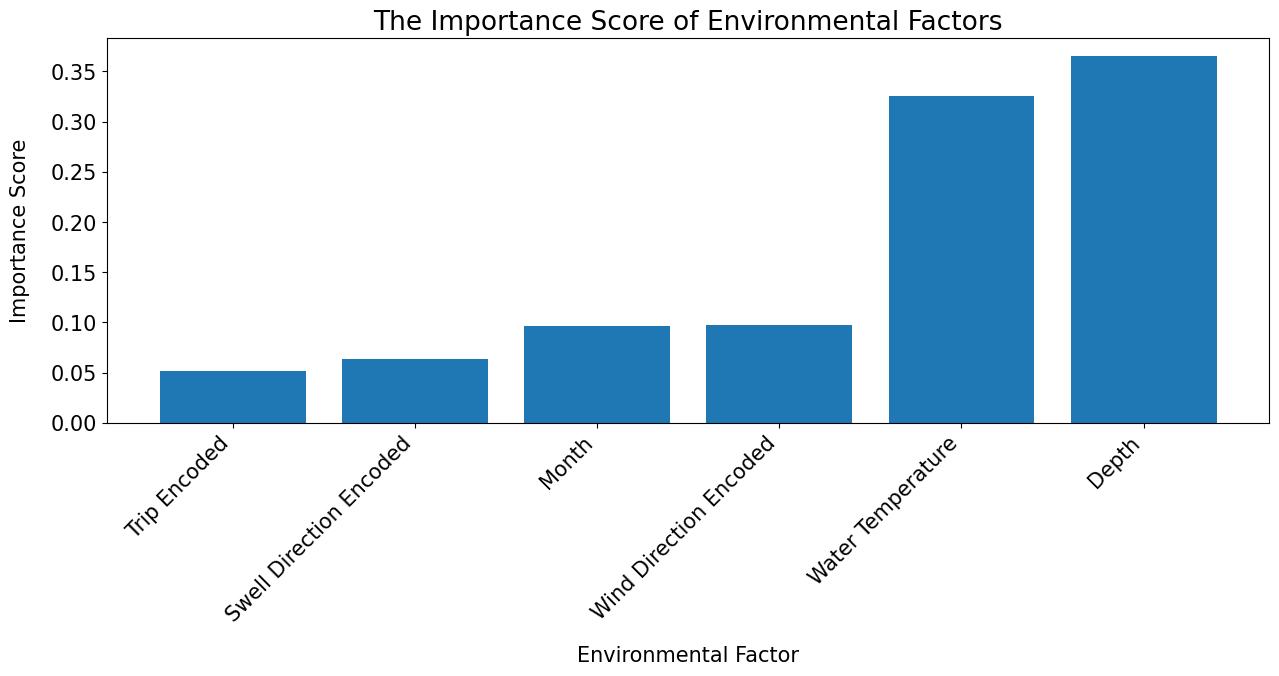

In [ ]:
# Sort features by importance in ascending order
sorted_index = np.argsort(rfc.feature_importances_)
sorted_features = [X_train.columns[i] for i in sorted_index]

# Plot Feature Importance
# Define figure size
plt.figure(figsize=(15, 5))
plt.bar(sorted_features, rfc.feature_importances_[sorted_index])
# Rotate labels 45 degrees
plt.xticks(rotation=45, ha='right')
# Set labels
plt.xlabel("Environmental Factor", fontsize=default_graph_font_size, labelpad=15)
plt.ylabel("Importance Score", fontsize=default_graph_font_size, labelpad=15)
plt.title("The Importance Score of Environmental Factors",
          fontsize=graph_title_font_size)

# Set font size for tick labels on x and y axes
plt.tick_params(axis='x', labelsize=default_graph_font_size)
plt.tick_params(axis='y', labelsize=default_graph_font_size)

# Display graph
plt.show()

# Conclusion

The model accuracy does not drop much after removing unnecessary features, so I can conclude to keep the new filtered features.

# Skill notes
Working with pandas library:
- Read and write dataframe
- Loop through columns
```
[column for column in df.columns ...]
```
- Drop columns:
```
df.drop(columns=['A', 'B'], inplace=True)
```
- Convert data type of a column to a new one
```
pd.to_datetime(df['A'], errors='coerce')
```
- Remove records having NA in a column (example: 'A') in the dataframe:
```
df.dropna(subset=['A'])
```